In [181]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras import layers

In [ ]:
print(tf.__version__)

2.8.0


In [182]:
fasion_mnist=keras.datasets.fashion_mnist
(train_image,train_lable),(test_image,test_label)=fasion_mnist.load_data()
# !wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz -P dataset


In [4]:
a=train_lable.max()
b=train_lable.min()
a-b+1

10

In [183]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [184]:
# Explore the data
train_image.shape

(60000, 28, 28)

In [7]:
test_image.shape

(10000, 28, 28)

In [8]:
test_label.shape

(10000,)

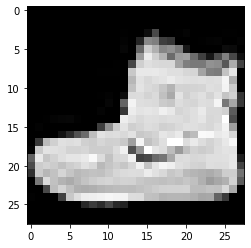

In [185]:
# preprocess the data
plt.imshow(train_image[0],cmap='gray')

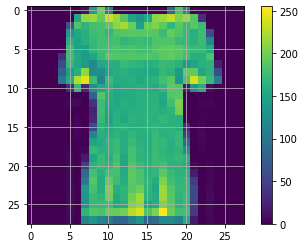

In [186]:
# preprocess the data
plt.imshow(train_image[10])
plt.colorbar()
plt.grid(True)
plt.show()

In [19]:
train_image = train_image /255
test_image = test_image /255 

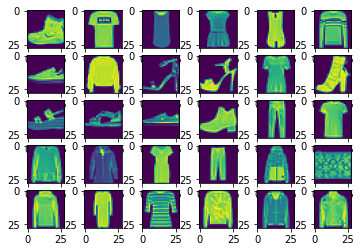

In [20]:
# display first 30 images with thier classname

for i in range (30):
  plt.subplot(5,6,i+1)
  plt.imshow(train_image[i])

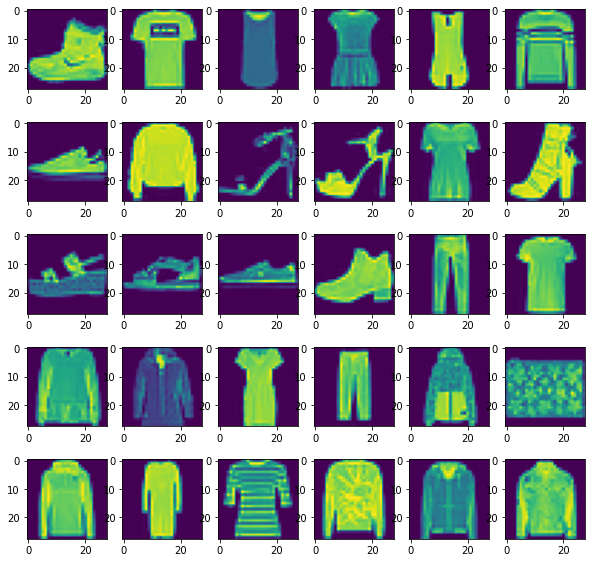

In [21]:
plt.figure(figsize=(10,10))#default(6.4,4.8)
for i in range (30):
  plt.subplot(5,6,i+1)
  plt.imshow(train_image[i])
  

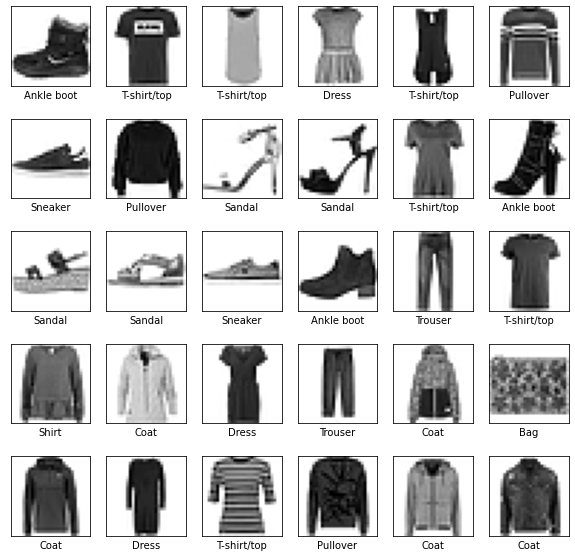

In [187]:
plt.figure(figsize=(10,10))#facecolor='r'
for i in range (30):
  plt.subplot(5,6,i+1)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(train_image[i],cmap='binary')# cmap=plt.cm.binary
  plt.xlabel(class_names[train_lable[i]])
plt.show()

In [188]:

from keras.layers import MaxPooling2D
from keras.layers import Conv2D
# to convert images from (28,28) to 28*28=784 we use reshape or flatten
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

In [81]:
# model=Sequential()
# model.add(layers.Flatten(input_shape=(28,28)))
# model.add(layers.Dense(128,activation='relu'))
# model.add(layers.Dense(10))

In [189]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 3, 3, 64)          73792     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 1, 1, 64)       

In [190]:
opt = keras.optimizers.Adam(lr=1e-3)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
              ,optimizer=opt,metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [191]:
x_val=train_image[:10000]
y_val=train_lable[:10000]
train_image=train_image[10000:]
train_lable=train_lable[10000:]

In [192]:

h=model.fit(train_image,train_lable,epochs=20,batch_size=256,validation_data=(x_val,y_val))

Epoch 1/20
196/196 [==============================] - 5s 20ms/step - loss: 1.2809 - accuracy: 0.6212 - val_loss: 0.5661 - val_accuracy: 0.7927
Epoch 2/20
196/196 [==============================] - 4s 18ms/step - loss: 0.5791 - accuracy: 0.7996 - val_loss: 0.4806 - val_accuracy: 0.8262
Epoch 3/20
196/196 [==============================] - 4s 18ms/step - loss: 0.4760 - accuracy: 0.8330 - val_loss: 0.4068 - val_accuracy: 0.8532
Epoch 4/20
196/196 [==============================] - 4s 18ms/step - loss: 0.4188 - accuracy: 0.8526 - val_loss: 0.3815 - val_accuracy: 0.8624
Epoch 5/20
196/196 [==============================] - 3s 18ms/step - loss: 0.3845 - accuracy: 0.8626 - val_loss: 0.3653 - val_accuracy: 0.8674
Epoch 6/20
196/196 [==============================] - 3s 17ms/step - loss: 0.3601 - accuracy: 0.8748 - val_loss: 0.3784 - val_accuracy: 0.8615
Epoch 7/20
196/196 [==============================] - 3s 18ms/step - loss: 0.3365 - accuracy: 0.8810 - val_loss: 0.3458 - val_accuracy: 0.8772

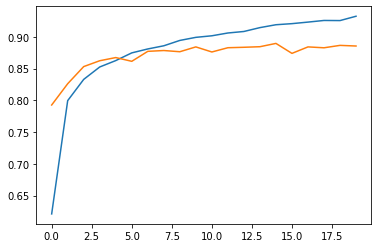

In [193]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])


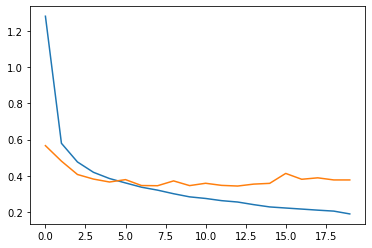

In [194]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [195]:
# evaluate
los,acc=model.evaluate(test_image,test_label)
print('accouracy = ',acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.3816 - accuracy: 0.8790
accouracy =  0.8790000081062317


In [197]:
probobility_model=Sequential([model,layers.Softmax()])
predictions=probobility_model.predict(test_image)

In [276]:
i=123
predictions[i]

numpy.ndarray

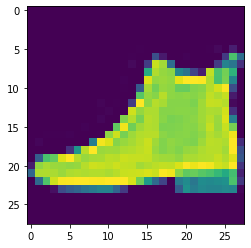

In [270]:

plt.imshow(test_image[i])

In [271]:
n=np.argmax(predictions[i])
print(n)

9


In [272]:
class_names[n]

'Ankle boot'

In [273]:
m=test_label[i]
print(m)

9


In [274]:
class_names[m]

'Ankle boot'

In [303]:
def plot_imag(prediction_i,img,true_label):
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap='binary')

  predicted=np.argmax(prediction_i)

  if predicted==true_label:
     c='green'
  else:
     c='red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted],
              100*np.max(prediction_i),class_names[true_label]),color=c)



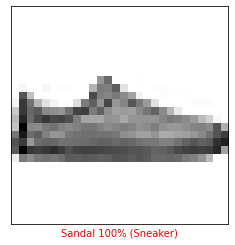

In [344]:
i=12
plot_imag(predictions[i],test_image[i],test_label[i])

In [343]:
def plot_value(prediction_i,true_label):
  plt.xticks(range(10))
  plt.yticks([])

  bar=plt.bar(range(10),prediction_i,color="#777777")
  plt.ylim([0,1])
  
  predicted=np.argmax(prediction_i)

  bar[predicted].set_color('red')
  bar[true_label].set_color('green')


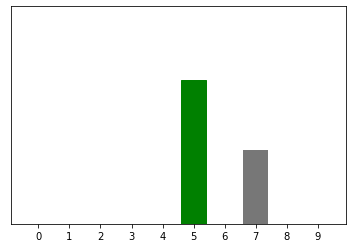

In [347]:
i=11
plot_value(predictions[i],test_label[i])